# Intel Image Classification 

## 1. Importing Necessary Libraries

In [24]:
# utilities
import numpy as np # linear algebra
import pandas as pd # data processing
import pickle
import random

# visualization
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# tensorflow
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

from tensorflow.keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("../input"))

['intel-image-classification']


## 2. Preprocessing

### Function that reads the images to numpy arrays

In [25]:
def img_to_array(path, category_no, X, y = [], label = True):
    for p in os.listdir(path):
        img = cv2.imread(os.path.join(path, p), cv2.IMREAD_GRAYSCALE)
        img_np = cv2.resize(img, dsize = (150, 150))
        X.append(img_np)
        if label == True:
            y.append(category_no)

### Reading train images

In [26]:
path_train = "/kaggle/input/intel-image-classification/seg_train/seg_train/"

category_list = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

X_train = []
y_train = []

for i in range(len(category_list)):
    img_to_array(path_train + category_list[i], i, X_train, y_train)

X_train = np.array(X_train).reshape(-1,150,150,1)
y_train = np.array(y_train)

### Reading test images

In [27]:
path_test = "/kaggle/input/intel-image-classification/seg_test/seg_test/"

X_test = []
y_test = []

for i in range(len(category_list)):
    img_to_array(path_test + category_list[i], i, X_test, y_test)

X_test = np.array(X_test).reshape(-1,150,150,1)
y_test = np.array(y_test)

### Reading pred images

In [28]:
path_pred = "/kaggle/input/intel-image-classification/seg_pred/seg_pred/"

X_pred = []

img_to_array(path_pred, i, X_pred, label = False)
    
X_pred = np.array(X_pred).reshape(-1,150,150,1)

**We also reshape the X_train, X_test, X_pred arrays and y_train, y_test arrays in order to use in Convolutional Neural Network Layers.**

### Let's look at their shapes

In [29]:
X_train.shape, y_train.shape

((14034, 150, 150, 1), (14034,))

In [30]:
X_test.shape, y_test.shape

((3000, 150, 150, 1), (3000,))

In [31]:
X_pred.shape

(7301, 150, 150, 1)

### Let's look at some images

#### Here we create a 0 to 24999 number list.

In [32]:
num_list = list(range(14034))

#### Here we chose random number from the list.

mountain


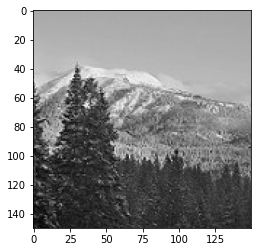

In [33]:
i = random.choice(num_list)
print(category_list[y_train[i]])
plt.imshow(X_train[i], cmap = "gray")

sea


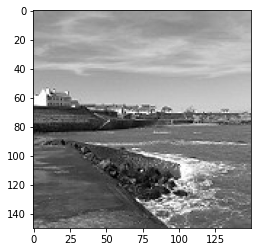

In [34]:
i = random.choice(num_list)
print(category_list[y_train[i]])
plt.imshow(X_train[i], cmap = "gray")

## Let's visualize the number of classes

In [35]:
df = pd.DataFrame(y_train)

<AxesSubplot:ylabel='count'>

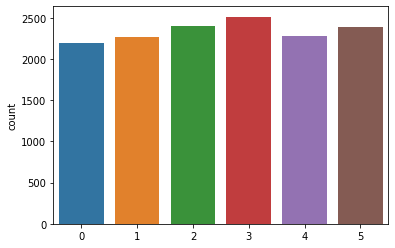

In [36]:
sns.countplot(y_train)

## Normalizing

#### Here we normalize the data so it converges faster to global minima.

In [37]:
X_train = X_train / 255
X_test = X_test / 255
X_pred = X_pred / 255

## 3. Modeling and Predicting

### Here we are constructing our CNN layers. We use Conv2D, MaxPooling2D, Dropout, Flatten and Dense layers.

In [58]:
model = Sequential([
    Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,1)),
    Conv2D(32, (3,3), activation = "relu"),
    MaxPooling2D(2,2),
    Dropout(0.5),
    Conv2D(64, (3,3), activation = "relu"),
    Conv2D(64, (3,3), activation = "relu"),
    MaxPooling2D(2,2),
    Dropout(0.5),
    Conv2D(128, (3,3), activation = "relu"),
    Conv2D(128, (3,3), activation = "relu"),
    MaxPooling2D(2,2),
    Dropout(0.5),
    Conv2D(256, (3,3), activation = "relu"),
    Conv2D(256, (3,3), activation = "relu"),
    MaxPooling2D(2,2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation = "relu", kernel_regularizer = l2(0.001)),
    Dropout(0.5),
    Dense(6, activation = "softmax")
])

### Here we set compiler configurations.

In [59]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

### Here we save the history of fitting the data.

In [60]:
history = model.fit(X_train, y_train, batch_size = 256, epochs = 50, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/50
55/55 [==============================] - 13s 230ms/step - loss: 1.9196 - accuracy: 0.2320 - val_loss: 1.5157 - val_accuracy: 0.4927
Epoch 2/50
55/55 [==============================] - 12s 221ms/step - loss: 1.3744 - accuracy: 0.4602 - val_loss: 1.1457 - val_accuracy: 0.5910
Epoch 3/50
55/55 [==============================] - 12s 221ms/step - loss: 1.1664 - accuracy: 0.5432 - val_loss: 1.0928 - val_accuracy: 0.6053
Epoch 4/50
55/55 [==============================] - 12s 222ms/step - loss: 1.0339 - accuracy: 0.6145 - val_loss: 0.9919 - val_accuracy: 0.6287
Epoch 5/50
55/55 [==============================] - 12s 221ms/step - loss: 0.9415 - accuracy: 0.6446 - val_loss: 1.0952 - val_accuracy: 0.6093
Epoch 6/50
55/55 [==============================] - 12s 221ms/step - loss: 0.8989 - accuracy: 0.6638 - val_loss: 0.8984 - val_accuracy: 0.6887
Epoch 7/50
55/55 [==============================] - 12s 221ms/step - loss: 0.8393 - accuracy: 0.6969 - val_loss: 0.8238 - val_accuracy: 0.7050

### Let's see the accuracy.

In [61]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f" % (accuracy*100))

94/94 [==============================] - 1s 10ms/step - loss: 0.5785 - accuracy: 0.8447
Accuracy: 84.47


### Let's visualize model accuracy and model loss.

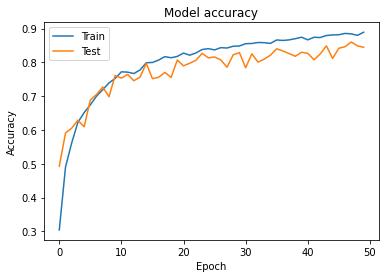

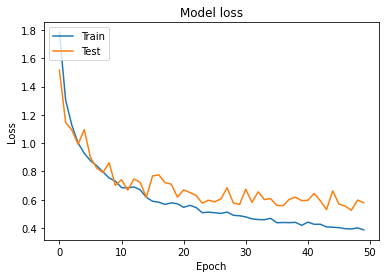

In [62]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

### Let's see the confusion matrix.

<AxesSubplot:>

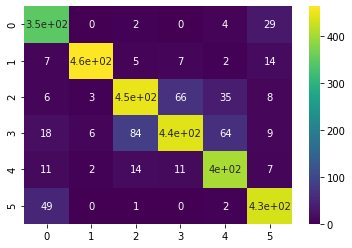

In [63]:
sns.heatmap(confusion_matrix(model.predict_classes(X_test), y_test), cmap = "viridis", annot = True)

### Predicting Classes

In [64]:
pred = model.predict_classes(X_pred)
pred = pred.flatten()

In [65]:
X_pred.shape[0]

7301

### Saving to DataFrame and save it to csv file

In [66]:
df = pd.DataFrame({"id": range(X_pred.shape[0]), "label": pred})

df.to_csv("result.csv", index = False)

### Let's look at some images and predict them

In [67]:
def predict_class(to_predict):
    to_predict = to_predict.reshape(1,150,150,1)
    pred = model.predict_classes(to_predict)
    plt.imshow(to_predict.reshape(150,150,1), "gray")
    plt.show()
    if pred[0] == 0:
        return "buildings"
    elif pred[0] == 1:
        return "forest"
    elif pred[0] == 2:
        return "glacier"
    elif pred[0] == 3:
        return "mountain"
    elif pred[0] == 4:
        return "sea"
    elif pred[0] == 5:
        return "street"

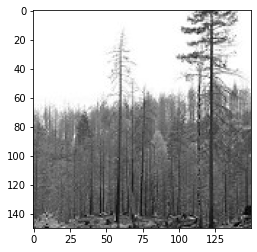

'forest'

In [71]:
predict_class(X_pred[10])

### It correctly predicted the forest.

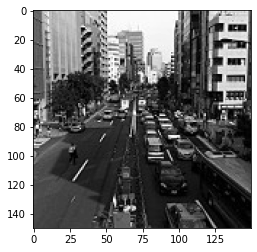

'street'

In [69]:
predict_class(X_pred[100])

### It correctly predicted the street.

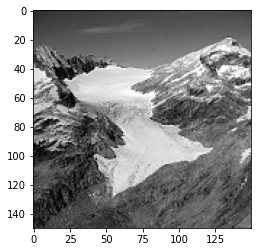

'glacier'

In [70]:
predict_class(X_pred[1600])

### Here there are icy mountain so it predict it as glacier. In such cases, even people may not be able to distinguish. So it is okay to mislabel.